In [1]:
import pandas as pd
import numpy as np

#### Einlesen des Datensatzes

In [2]:
X = pd.read_csv('diabetes.csv')
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Abspalten der Labels

In [3]:
y = X.iloc[:,-1]
X = X.drop(X.columns[-1], axis=1)

#### Verteilung der Labels

In [4]:
y.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

# Aufgabe 1: Modellbewertung mittels Kreuzvalidierung

#### a) Einfache Holdout-Methode

Wenden Sie die einfache Holdout-Methode an, um die Performance eines DecisionTrees-Classifiers mit den Parametern *max_depth*=6 und *min_samples_leaf*=3 zu bewerten. Trainieren Sie diesen mit sklearn auf einem Trainingsdatensatz, der 90% der Daten enthält, und werten Sie anschließend die Accuracy (=Anteil aller Instanzen, die korrekt klassifiziert wurden) auf dem Trainings- und auf dem Testdatensatz aus. Welche Beobachtung machen Sie? 
<br><br>
Hinweis: Zur Berechnung der Accuracy können Sie die Methode **score** der Klasse DecisionTreeClassifier verwenden.

In [5]:
from sklearn.model_selection import train_test_split

X1 = pd.read_csv('diabetes.csv')

train, test = train_test_split(X1, test_size = 0.10)

y_train = train.iloc[:,-1]
X_train = train.drop(X1.columns[-1], axis=1)

y_test = test.iloc[:,-1]
X_test = test.drop(X1.columns[-1], axis=1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

cl = DecisionTreeClassifier(max_depth=6, min_samples_leaf=3)

cl = cl.fit(X_train, y_train)

cl.score(X_test, y_test)

0.7792207792207793

#### b) $k$-fache Kreuzvalidierung anwenden

Wiederholen Sie nun Teilaufgabe a), indem Sie $10$-fache Kreuzvalidierung durchführen. Verwenden Sie dazu die Klasse <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html">*StratifiedKFold*</a>. Geben Sie die mittlere gemessene Accuracy (gemittelt über die 10 Testdatensätze) aus. Geben Sie außerdem für jeden einzelnen der 10 Durchläufe die Accuracy auf dem jeweiligen Trainings- und Testdatensatz an. Vergleichen Sie mit dem Ergebnis aus Teilaufgabe a). Bewerten Sie die Varianz des Modells.

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import explained_variance_score

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)


r_score = 0
for train_index, test_index in skf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    y_true = y_test
    y_pred = cl.predict(X_test)
    
    var = explained_variance_score(y_true, y_pred)
    
    
    cl = DecisionTreeClassifier(max_depth=6, min_samples_leaf=3)
    cl = cl.fit(X_train, y_train)
    score = cl.score(X_test, y_test)
    print("Score: ", score)
    print("Var: ", var)
    print("\n")
    r_score+=score

print("Final average: ", r_score/10)

Score:  0.6753246753246753
Var:  -2.220446049250313e-16


Score:  0.7272727272727273
Var:  0.4770370370370368


Score:  0.6753246753246753
Var:  0.3733333333333335


Score:  0.6103896103896104
Var:  0.048888888888889426


Score:  0.7142857142857143
Var:  0.6074074074074074


Score:  0.7272727272727273
Var:  0.44148148148148136


Score:  0.7922077922077922
Var:  0.44148148148148125


Score:  0.8571428571428571
Var:  0.3733333333333335


Score:  0.6842105263157895
Var:  0.25923076923076904


Score:  0.6842105263157895
Var:  0.301538461538462


Final average:  0.7147641831852358


# Aufgabe 2: Hyperparameteroptimierung durch GridSearch

#### a) $k$-fache Kreuzvalidierung

Erläutern Sie das Prinzip der $k$-fachen Kreuzvalidierung zur Hyperparameter-Optimierung. Geben Sie genau an, auf welchem Datensatz die einzelnen Trainings- und Auswertungsschritte jeweils vorgenommen werden.

##### Biasvariance Script seite 19

#### b) Train-Test-Split

Splitten Sie den Datensatz in einen Trainings- und einen Testdatensatz auf, wobei der Testdatensatz 20% der Samples enhalten soll. 

In [8]:
X1 = pd.read_csv('diabetes.csv')

train, test = train_test_split(X1, test_size = 0.20, random_state=42)

y_train = train.iloc[:,-1]
X_train = train.drop(X1.columns[-1], axis=1)

y_test = test.iloc[:,-1]
X_test = test.drop(X1.columns[-1], axis=1)

#### c) GridSearchCV

Wenden Sie $10$-fache Kreuzvalidierung auf dem Trainingsdatensatz an, um die besten Werte für die Hyperparameter *max_depth* und *min_samples_leaf* durch Rastersuche (engl. "grid search") zu ermitteln. Testen Sie für *max_depth* die Werte $\{1,2,3,4,5,6,7,8,9,10,15,20\}$ und für 
*min_samples_leaf* die Werte $\{1,5,10,20\}$. Geben Sie für jede mögliche Kombination die durch $k$-fache Kreuzvalidierung erhaltene mittlere Accuracy aus. Für welche Werte-Kombination ist diese am größten?

Hinweise: <br>
- Klasse <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">GridSearchCV</a> aus dem Paket sklearn.model_selection
- Die Attribute *best_params_* und  *best_score_* enthalten die optimalen Parameter und die zugehörige Accuracy
- Das Attribut *cv_results_* enthält die Infos zu allen Parameter-Kombinationen

In [9]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth":[1,2,3,4,5,6,7,8,9,10,15,20], 'min_samples_leaf':[1,5,10,20]}
cl = DecisionTreeClassifier()
clf = GridSearchCV(cl, parameters)
clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)
print(clf.cv_results_)


{'max_depth': 4, 'min_samples_leaf': 10}
0.7687458349993336
{'mean_fit_time': array([0.00449147, 0.00301819, 0.00370812, 0.00019941, 0.        ,
       0.00019927, 0.00648088, 0.00313625, 0.00312424, 0.00312433,
       0.00019598, 0.00670853, 0.0033545 , 0.00336018, 0.00313272,
       0.00695186, 0.00335526, 0.00340238, 0.00313606, 0.0033371 ,
       0.00313392, 0.00313711, 0.00335431, 0.00335541, 0.00335021,
       0.00059819, 0.00313597, 0.00334282, 0.00684094, 0.00313473,
       0.00312428, 0.00313592, 0.00334673, 0.00335941, 0.00313363,
       0.        , 0.00312443, 0.00312409, 0.00624857, 0.        ,
       0.00628452, 0.00313463, 0.        , 0.00312424, 0.00312428,
       0.00371571, 0.00366178, 0.0027895 ]), 'std_fit_time': array([0.00260708, 0.00603638, 0.00644426, 0.00039883, 0.        ,
       0.00039854, 0.0079443 , 0.00627251, 0.00624847, 0.00624866,
       0.00039196, 0.00821624, 0.006709  , 0.00672035, 0.00626545,
       0.00852221, 0.00671053, 0.00680475, 0.00627213, 0.

#### d) Modelltraining mit den optimalen Parametern

Trainieren Sie nun einen DecisionTreeClassifier mit den optimalen Parametern auf dem Trainingsdatensatz und werten Sie die Accuracy auf dem Trainings- und auf dem Testdatensatz aus. Was beobachten Sie? Vergleichen Sie mit den Ergebnissen aus Teilaufgabe c)

In [53]:
cl = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)
cl.fit(X_train, y_train)

print(cl.score(X_test, y_test))
print(cl.score(X_train, y_train))

0.7012987012987013
0.7915309446254072


#### e) Modellbewertung: Verzerrung und Varianz

Untersuchen/Bewerten Sie die Verzerrung und die Varianz des resultierenden Modells.

In [54]:
#TODO (hier muss ggf. kein neuer Code geschrieben werden)

# Aufgabe 3: Regularisierung bei der polynomialen Regression

#### Erzeugung von Zufallsdaten

In [55]:
X = np.array([0, 1, 2, 2.5, 3, 3.6, 4, 4.7, 5])
y = 0.5*X + 1 + 0.3*np.random.randn(len(X))

X = X/np.max(X)
y = y/np.max(y)

#### Visualisierung der Datenpunkte

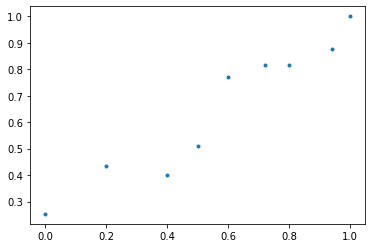

In [56]:
import matplotlib.pyplot as plt
plt.plot(X,y,'.')

#### a) Polynomiale Regression: Parameterbestimmung durch Aufstellen und Lösen der Normalgleichungen

Implementieren Sie eine Funktion namens **polyreg**, die die Parameter $\vec{\theta}=(\theta_0,\theta_1,\ldots,\theta_d)$ einer polynomialen Regression mit Hilfe eines Least-Squares-Ansatzes berechnet. Es soll also in Abhängigkeit vom Polynomgrad $d$ eine Modellfunktion der Form $f_{\vec{\theta}}(x)=\theta_0+\theta_1x+\theta_2x^2+\ldots+\theta_dx^d$ bestimmt werden. Stellen Sie dazu die Normalgleichungen auf (s. Vorlesung über Lineare Regression) und lösen Sie diese.

In [101]:
#def polyreg(X, y, d, L):

def polyreg(X, y, d, L):
    """
    calculates the coefficients of a polynomial regression function 
    
    Parameters:
        X (array): training examples for the input variable (1-dimensional array)
        y (array): output values corresponding to X (1-dimensional array)
        d (int): degree of the polynomial to be fit
        
    Returns:
        theta (array): coefficients of the regression function
    """
    
    cntr = 0
    mx = np.ones((X.size, d+1))
    for i in X:
        for j in range(d+1):
            mx[cntr, j] = i**j
        cntr = cntr+1
    I = np.identity(d+1)
    
    theta = np.linalg.inv((mx.T@mx+L*I))@mx.T@y
    
    return theta



In [87]:
polyreg(X,y, 3, 0)

array([ 0.27472227,  0.13736278,  1.33553845, -0.78340543])

#### b) Modellanwendung

Fitten Sie mit Hilfe der in a) implementierten Funktion ein Polynom 10. Grades an die gegebenen Daten. Zeichnen Sie das Polynom mit in die Grafik ein. Welche Beobachtung machen Sie?
<br><br>
Hinweis: mit der Funktion **numpy.polyval** kann man ein Polynom mit gegebenen Koeffizienten auswerten. Dazu muss ggf. die Reihenfolge des Parametervektors theta umgekehrt werden. Dies leistet die Funktion **numpy.flipud**

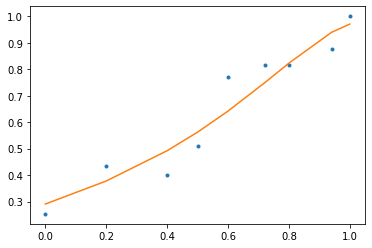

In [100]:
t = np.flipud(polyreg(X,y,10,0.1))
p = np.polyval(t,X)

plt.plot(X,y,'.')
plt.plot(X,p)

In [91]:
y

array([0.2532973 , 0.43287674, 0.40082551, 0.51000437, 0.77115385,
       0.81571305, 0.81527421, 0.87549752, 1.        ])

#### c) Regularisierung

Erweitern Sie die in a) geschriebene Funktion, indem Sie Regularisierung "einbauen". Der Regularisierungsparameter L soll als zusätzliches Argument übergeben werden. Überlegen Sie sich zunächst, wie die Normalgleichungen für die regularisierte polynomiale Regression lauten. Testen Sie anschließend für L=0 und L=1000 die Funktion. Visualisieren Sie jeweils die resultierende Modellfunktion.